In [1]:
# Scikit-Learn regression and classification

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.DataFrame(index=pd.date_range('2000', '2020'))
df['BookPressure'] = np.random.randn(len(df)) * 2
df['TradePressure'] = np.random.randn(len(df)) * 100
df['RelativeValue'] = np.random.randn(len(df)) * 50
df['Microstructure'] = np.random.randn(len(df)) * 10

true_coefficients = np.random.randint(low=-100, high=101, size=4) / 10
df['PriceChange'] = ((df['BookPressure'] * true_coefficients[0])
+ (df['TradePressure'] * true_coefficients[1])
+ (df['RelativeValue'] * true_coefficients[2])
+ (df['Microstructure'] * true_coefficients[3])
+ (np.random.randn(len(df)) * 200))

df['Price'] = df['PriceChange'].cumsum(0) + 100000

In [4]:
true_coefficients

array([-1.2, -3.7,  3. , -5.6])

In [5]:
df

,BookPressure,TradePressure,RelativeValue,Microstructure,PriceChange,Price
2000-01-01,-1.839907,-85.612155,-6.938942,-10.651925,338.138086,100338.138086
2000-01-02,-0.315703,-89.360808,-33.563426,-9.826705,278.661879,100616.799965
2000-01-03,-1.470060,125.790496,-10.455665,6.313915,-565.361430,100051.438535
2000-01-04,-0.502931,108.540356,25.964817,6.904299,-341.128957,99710.309577
2000-01-05,-4.419970,46.914441,-46.696141,11.422242,-362.616053,99347.693525
...,...,...,...,...,...,...
2019-12-28,-1.210556,-185.668864,41.043954,-17.108836,874.813411,85679.753947
2019-12-29,-0.430203,-56.677658,21.052610,6.097294,166.420662,85846.174609
2019-12-30,3.727622,-29.141285,18.424713,0.012556,135.054233,85981.228842
2019-12-31,0.096778,111.825317,-119.275958,-8.472983,-829.515682,85151.713160


<Axes: >

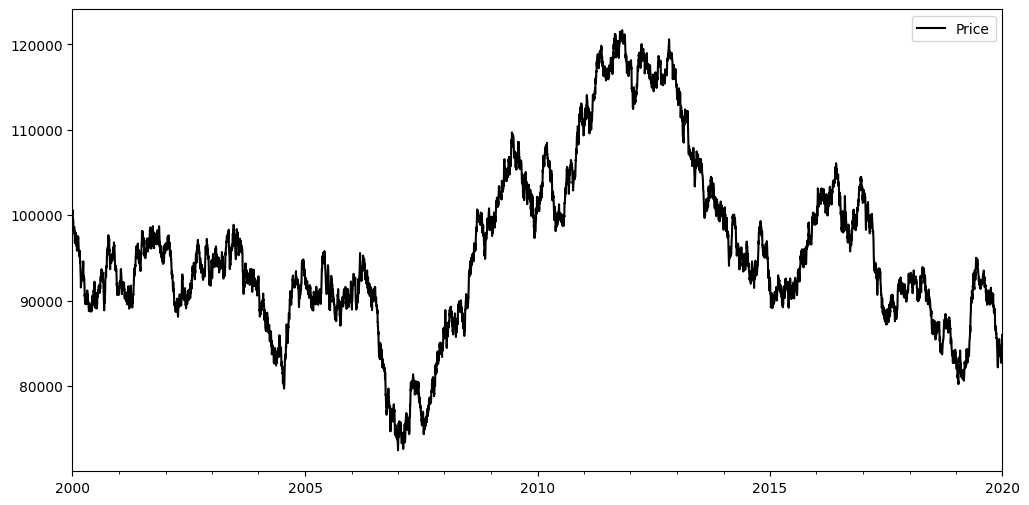

In [6]:
df['Price'].plot(figsize=(12, 6), color='black', legend='Price')

array([[<Axes: xlabel='BookPressure', ylabel='BookPressure'>,
        <Axes: xlabel='TradePressure', ylabel='BookPressure'>,
        <Axes: xlabel='RelativeValue', ylabel='BookPressure'>,
        <Axes: xlabel='Microstructure', ylabel='BookPressure'>,
        <Axes: xlabel='PriceChange', ylabel='BookPressure'>],
       [<Axes: xlabel='BookPressure', ylabel='TradePressure'>,
        <Axes: xlabel='TradePressure', ylabel='TradePressure'>,
        <Axes: xlabel='RelativeValue', ylabel='TradePressure'>,
        <Axes: xlabel='Microstructure', ylabel='TradePressure'>,
        <Axes: xlabel='PriceChange', ylabel='TradePressure'>],
       [<Axes: xlabel='BookPressure', ylabel='RelativeValue'>,
        <Axes: xlabel='TradePressure', ylabel='RelativeValue'>,
        <Axes: xlabel='RelativeValue', ylabel='RelativeValue'>,
        <Axes: xlabel='Microstructure', ylabel='RelativeValue'>,
        <Axes: xlabel='PriceChange', ylabel='RelativeValue'>],
       [<Axes: xlabel='BookPressure', ylabel='Mi

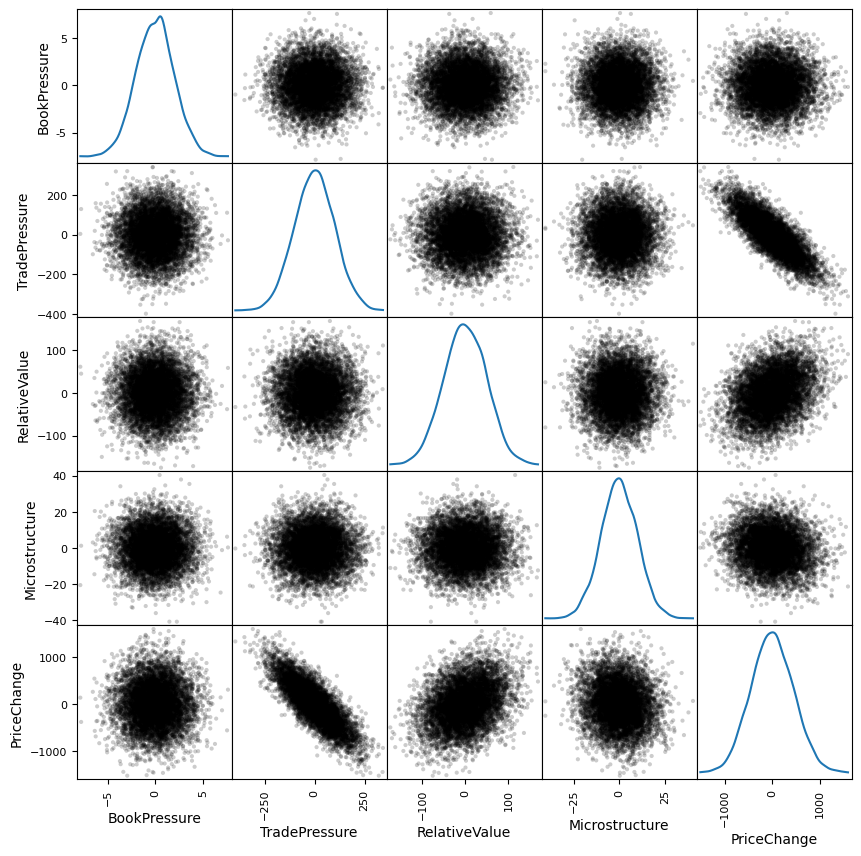

In [7]:
pd.plotting.scatter_matrix(df.drop('Price', axis=1), color='black', alpha=0.2, grid=True, diagonal='kde', figsize=(10, 10))

In [8]:
# Regression

In [9]:
features = df[['BookPressure', 'TradePressure', 'RelativeValue', 'Microstructure']]
target = df['PriceChange']

In [10]:
from sklearn.linear_model import RidgeCV
ridge = RidgeCV()
ridge.fit(features, target)

RidgeCV()

In [11]:
true_coefficients, ridge.coef_

(array([-1.2, -3.7,  3. , -5.6]),
 array([ 0.46487792, -3.66951846,  2.94979541, -5.61630493]))

In [12]:
ridge.score(features, target)

0.7981195839740829

In [13]:
df['PredPrice'] = ridge.predict(features).cumsum(0) + 100000; df

,BookPressure,TradePressure,RelativeValue,Microstructure,PriceChange,Price,PredPrice
2000-01-01,-1.839907,-85.612155,-6.938942,-10.651925,338.138086,100338.138086,100348.289950
2000-01-02,-0.315703,-89.360808,-33.563426,-9.826705,278.661879,100616.799965,100627.872752
2000-01-03,-1.470060,125.790496,-10.455665,6.313915,-565.361430,100051.438535,100094.929759
2000-01-04,-0.502931,108.540356,25.964817,6.904299,-341.128957,99710.309577,99729.853263
2000-01-05,-4.419970,46.914441,-46.696141,11.422242,-362.616053,99347.693525,99349.384153
...,...,...,...,...,...,...,...
2019-12-28,-1.210556,-185.668864,41.043954,-17.108836,874.813411,85679.753947,85618.903973
2019-12-29,-0.430203,-56.677658,21.052610,6.097294,166.420662,85846.174609,85850.174220
2019-12-30,3.727622,-29.141285,18.424713,0.012556,135.054233,85981.228842,86008.754106
2019-12-31,0.096778,111.825317,-119.275958,-8.472983,-829.515682,85151.713160,85289.835116


<Axes: >

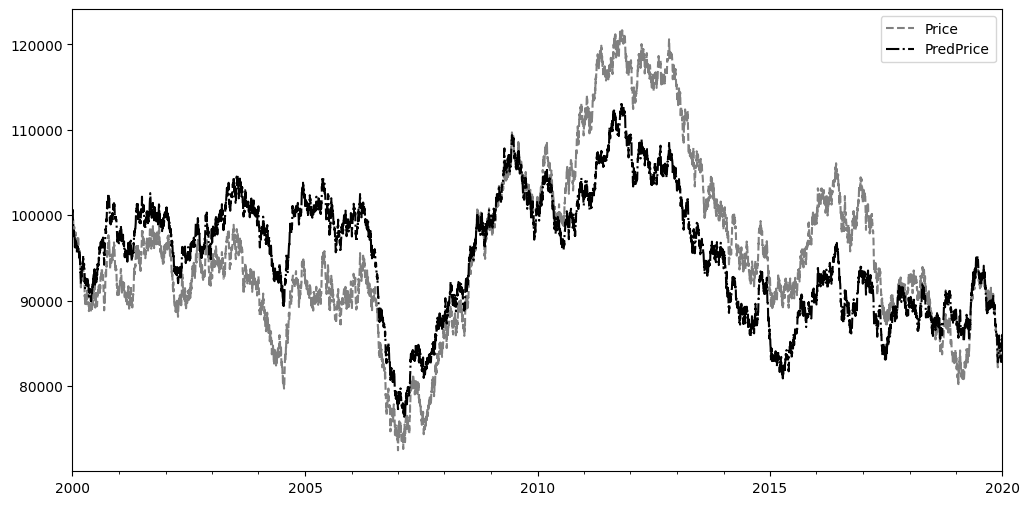

In [14]:
df['Price'].plot(figsize=(12, 6), color='gray', linestyle='--', legend='Price')
df['PredPrice'].plot(figsize=(12, 6), color='black', linestyle='-.', legend='PredPrice')

<Axes: >

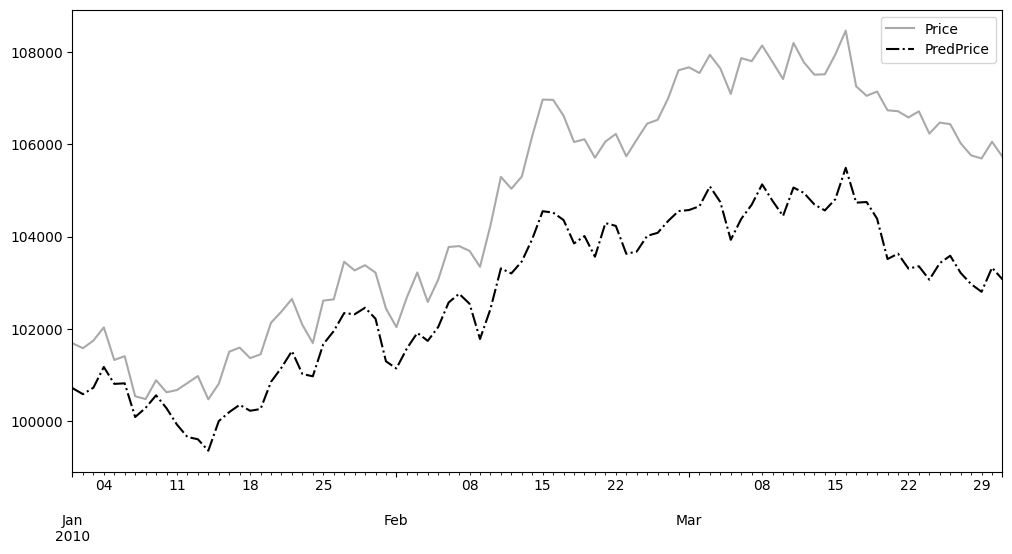

In [15]:
df['Price'].loc['2010-01-01':'2010-03-31'].plot(figsize=(12, 6), color='darkgray', linestyle='-', legend='Price')
df['PredPrice'].loc['2010-01-01':'2010-03-31'].plot(figsize=(12, 6), color='black', linestyle='-.', legend='PredPrice')

<Axes: ylabel='Density'>

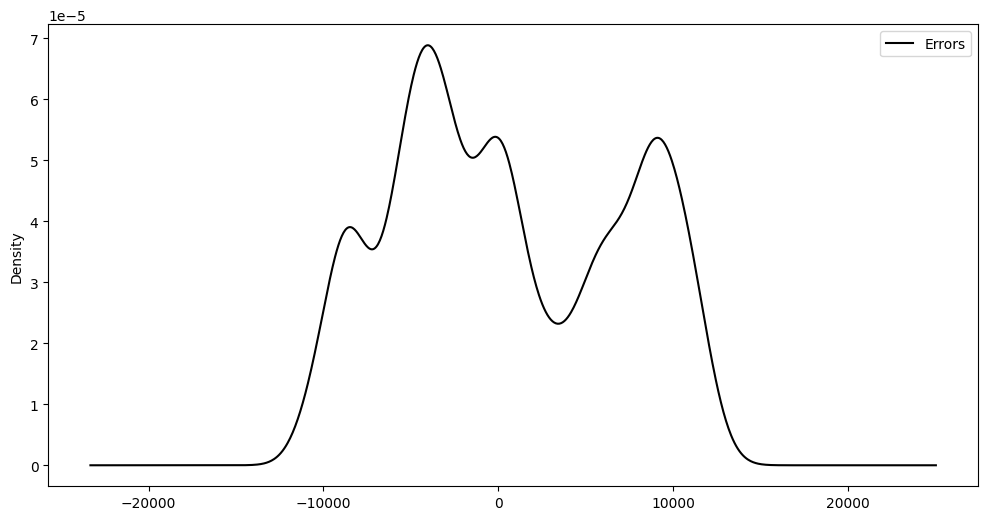

In [16]:
df['Errors'] = df['Price'] - df['PredPrice']
df['Errors'].plot(figsize=(12, 6), kind='kde', color='black', legend='Errors')

In [17]:
# Classification

In [18]:
target_discrete = pd.cut(target, bins=5, labels=[-2, -1, 0, 1, 2]).astype(int); target_discrete

2000-01-01    0
2000-01-02    0
2000-01-03   -1
2000-01-04   -1
2000-01-05   -1
             ..
2019-12-28    1
2019-12-29    0
2019-12-30    0
2019-12-31   -1
2020-01-01    1
Freq: D, Name: PriceChange, Length: 7306, dtype: int64

<Axes: ylabel='Frequency'>

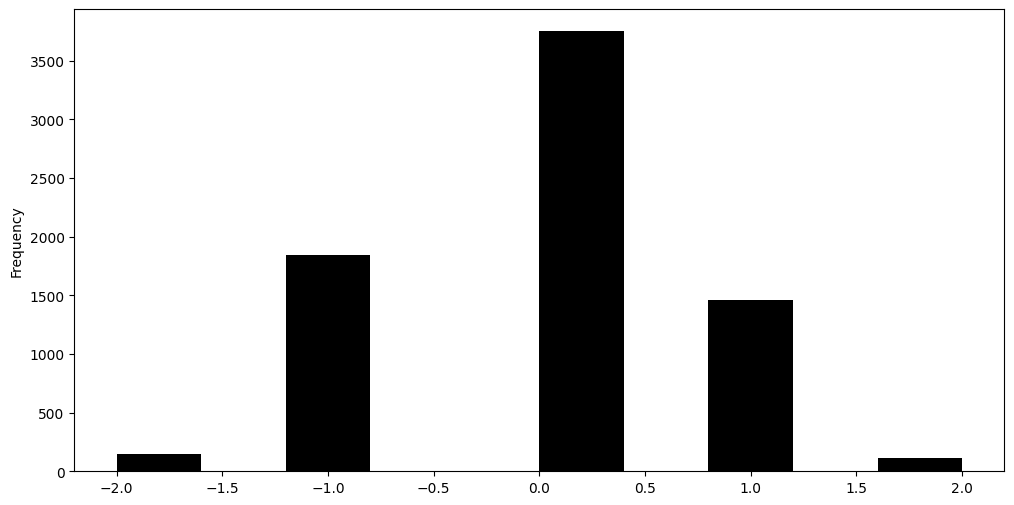

In [19]:
target_discrete.plot(figsize=(12, 6), kind='hist', color='black')

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5)
rf.fit(features, target_discrete)

RandomForestClassifier(max_depth=5)

In [21]:
rf.score(features, target_discrete)

0.7441828633999452

In [22]:
df['DiscretePriceChange'] = target_discrete
df['PredDiscretePriceChange'] = rf.predict(features)
df

,BookPressure,TradePressure,RelativeValue,Microstructure,PriceChange,Price,PredPrice,Errors,DiscretePriceChange,PredDiscretePriceChange
2000-01-01,-1.839907,-85.612155,-6.938942,-10.651925,338.138086,100338.138086,100348.289950,-10.151864,0,0
2000-01-02,-0.315703,-89.360808,-33.563426,-9.826705,278.661879,100616.799965,100627.872752,-11.072787,0,0
2000-01-03,-1.470060,125.790496,-10.455665,6.313915,-565.361430,100051.438535,100094.929759,-43.491224,-1,-1
2000-01-04,-0.502931,108.540356,25.964817,6.904299,-341.128957,99710.309577,99729.853263,-19.543685,-1,-1
2000-01-05,-4.419970,46.914441,-46.696141,11.422242,-362.616053,99347.693525,99349.384153,-1.690629,-1,-1
...,...,...,...,...,...,...,...,...,...,...
2019-12-28,-1.210556,-185.668864,41.043954,-17.108836,874.813411,85679.753947,85618.903973,60.849974,1,1
2019-12-29,-0.430203,-56.677658,21.052610,6.097294,166.420662,85846.174609,85850.174220,-3.999612,0,0
2019-12-30,3.727622,-29.141285,18.424713,0.012556,135.054233,85981.228842,86008.754106,-27.525264,0,0
2019-12-31,0.096778,111.825317,-119.275958,-8.472983,-829.515682,85151.713160,85289.835116,-138.121957,-1,-1


<Axes: >

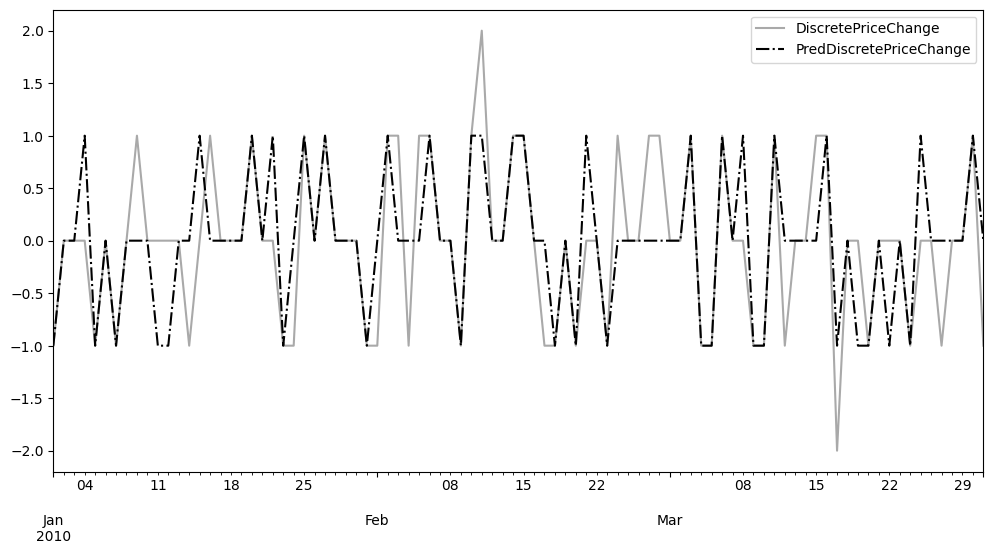

In [23]:
df['DiscretePriceChange'].loc['2010-01-01':'2010-03-31'].plot(figsize=(12, 6), color='darkgray', linestyle='-', legend='Price')
df['PredDiscretePriceChange'].loc['2010-01-01':'2010-03-31'].plot(figsize=(12, 6), color='black', linestyle='-.', legend='PredPrice')

<Axes: ylabel='Density'>

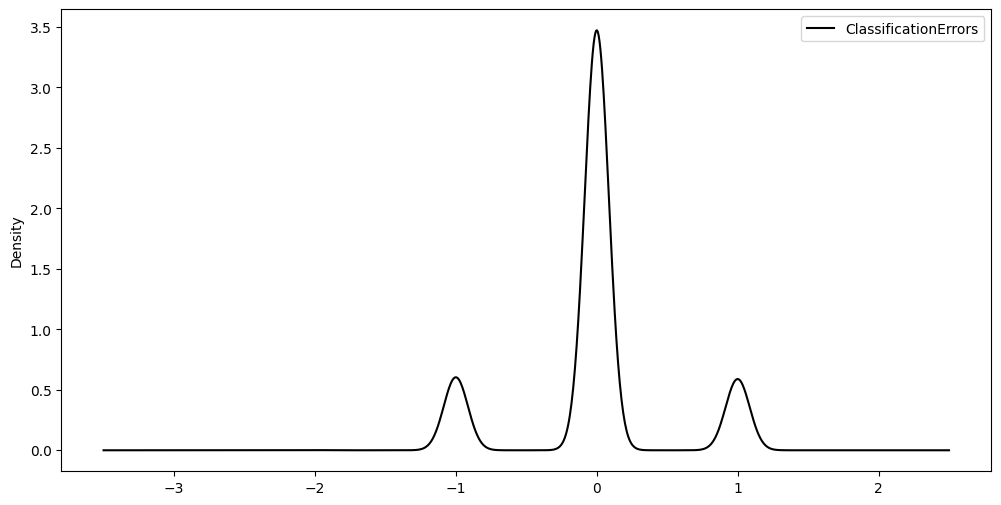

In [24]:
df['ClassificationErrors'] = df['DiscretePriceChange'] - df['PredDiscretePriceChange']
df['ClassificationErrors'].plot(figsize=(12, 6), kind='kde', color='black', legend='ClassificationErrors')